In [31]:
import matplotlib.pyplot as plt
import numpy as np

class NN:
    def __init__(self, layer_sizes):
        np.random.seed(489)
        self.num_of_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.W = self.init_weights()
        self.b = self.init_biases()
        self.neurons = []
        
    def init_weights(self):
        W_all = []
        for layer_index in range(self.num_of_layers - 1):
            W_layer = []
            for neuron_index in range(self.layer_sizes[layer_index + 1]):
                W_neuron = np.random.randn(layer_sizes[layer_index])
                W_layer.append(W_neuron)
            W_all.append(np.asarray(W_layer))
        
        return W_all
    
    def init_biases(self):
        b_all = []
        for layer_index in range(self.num_of_layers - 1):
            size = self.layer_sizes[layer_index + 1]
            b_layer = np.random.randn(size).reshape(size, 1)
            b_all.append(b_layer)
        
        return b_all
    
    def train(self, X, y, num_of_iter, learning_rate):
        for i in range(num_of_iter):
            if i % 10 == 0:
                print(i)
            for j in range(len(X)):
                self.feed_forward(X[j])
                self.back_propagation(y[j], learning_rate)
                
    def predict(self, X):
        res = []
        for point in X:
            self.feed_forward(point)
            res.append(self.neurons[-1])
        return res

    def feed_forward(self, X):
        X = np.asarray(X).reshape((self.layer_sizes[0], 1))
        self.neurons = [X]
        for layer_index in range(self.num_of_layers - 1):
            z = np.matmul(self.W[layer_index], self.neurons[layer_index]) + self.b[layer_index]
            self.neurons.append(self.sigmoid(z))
            
    def back_propagation(self, y, alpha=.1):
        y = y.reshape(self.layer_sizes[-1], 1)
        y_hat = self.neurons[-1]
        C = .5 * (y_hat - y)**2
#         ### ONLY WORKS FOR [2,2] LAYERS ###
#         z = np.matmul(self.W[0], self.neurons[0]) + self.b[0]
#         delta = (y_hat - y) * self.sigmoid_prime(z)
#         dCdW = np.matmul(delta, self.neurons[0].T)
#         dCdb = delta
#         self.W[0] -= .1*dCdW
#         self.b[0] -= .1*dCdb
        
        for layer_index in range(self.num_of_layers - 1, 0, -1):
            z = np.matmul(self.W[layer_index - 1], self.neurons[layer_index - 1]) + self.b[layer_index - 1]
            if layer_index == self.num_of_layers - 1:
                delta = (y_hat - y) * self.sigmoid_prime(z)
            else:
                delta = np.matmul(self.W[layer_index].T, delta) * self.sigmoid_prime(z)
            dCdW = np.matmul(delta, self.neurons[layer_index - 1].T)
            dCdb = delta
            self.W[layer_index - 1] -= alpha * dCdW
            self.b[layer_index - 1] -= alpha * dCdb
            
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return np.exp(-z) / (1 + np.exp(-z))**2
            
    def display_results(self):
        print("\n\nWeights:")
        for W_layer in self.W:
            print(W_layer)
        print("\n\nBiases")
        for b_layer in self.b:
            print(b_layer)
        print("\n\nNeurons:")
        for n_layer in self.neurons:
            print(n_layer)

In [3]:
def color_func(nn, xx, yy):
    xy_points = np.c_[xx.ravel(), yy.ravel()]
    Z = []
    for point in xy_points:
        nn.feed_forward(point)
        Z.append(nn.neurons[-1][1] - nn.neurons[-1][0])
    Z = np.asarray(Z)
    Z = Z.reshape(xx.shape)
    return Z

In [24]:
# choose a dataset and architecture
dataset = 1

if dataset == 1:
    X = np.array([[1, 1], 
                  [2, 3], 
                  [3, 2], 
                  [4, 5], 
                  [5, 3], 
                  [6, 4]])
    y = np.array([[1, 0], 
                  [1, 0], 
                  [1, 0], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1]])
if dataset == 2:
    X = np.array([[3, 3], 
                  [4, 2], 
                  [4, 3], 
                  [4, 4], 
                  [5, 3], 
                  [5, 4], 
                  [1, 2], 
                  [1, 4], 
                  [2, 1], 
                  [2, 6], 
                  [3, 5], 
                  [5, 2], 
                  [5, 5], 
                  [6, 1], 
                  [6, 3], 
                  [6, 4], 
                  [6, 6]])
    y = np.array([[1, 0], 
                  [1, 0], 
                  [1, 0], 
                  [1, 0], 
                  [1, 0], 
                  [1, 0], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1], 
                  [0, 1]])
layer_sizes = np.array([2, 10, 20, 10, 2])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


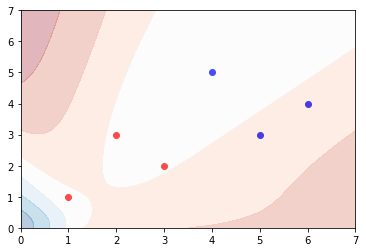

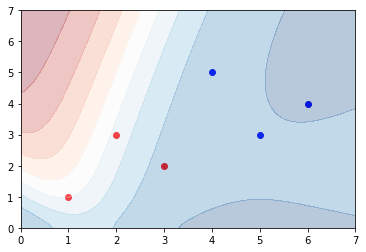

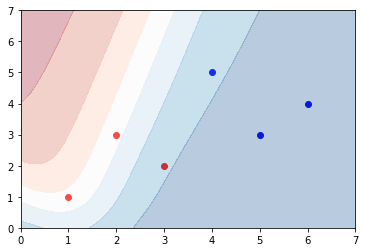

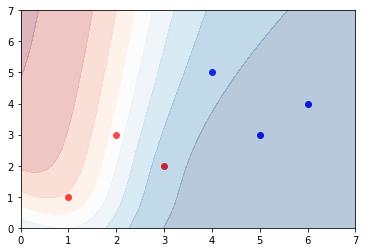

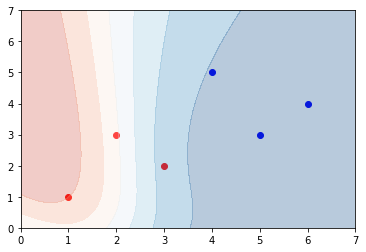

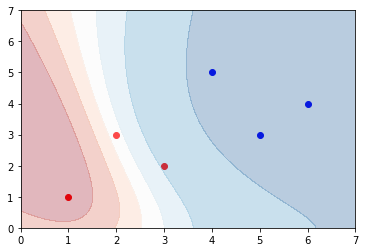

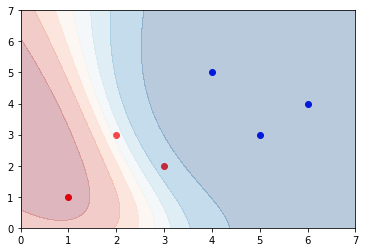

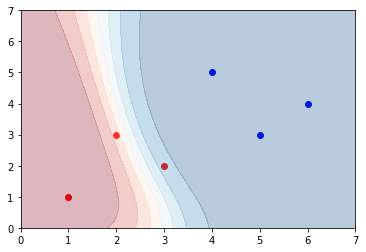

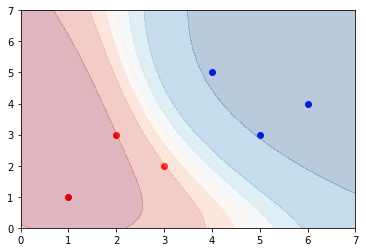

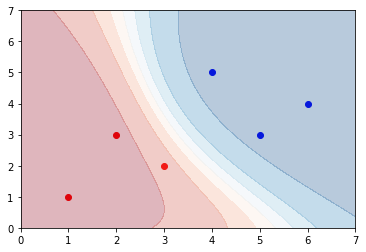

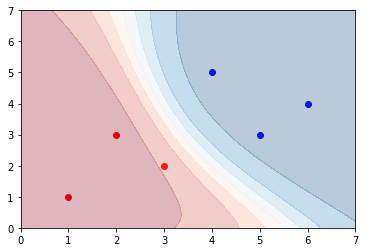

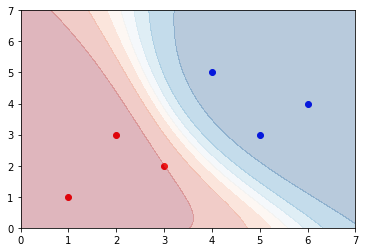

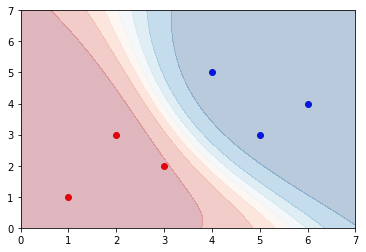

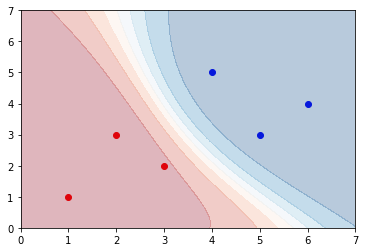

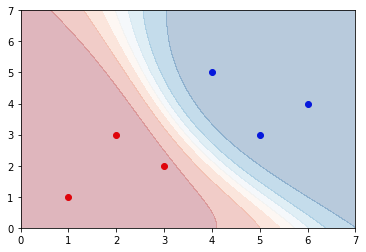

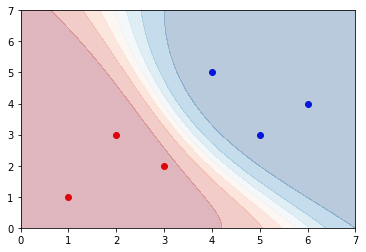

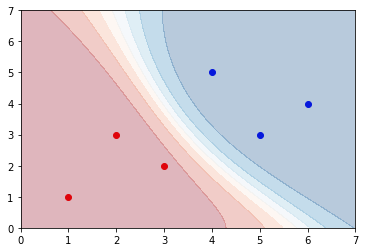

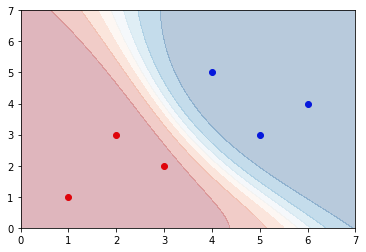

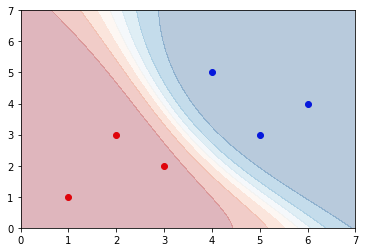

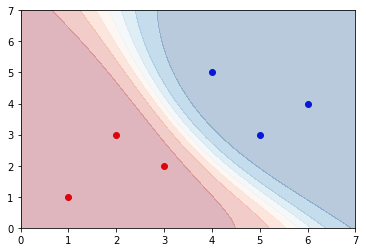

In [33]:
# setup neural network and save each figure from each iteration
nn = NN(layer_sizes)
num_of_iter = 200
learning_rate = .5
for i in range(num_of_iter):
    for j in range(len(X)):
        nn.feed_forward(X[j])
        nn.back_propagation(y[j], learning_rate)

    if i%10 == 0:
        # plot
        print(i)
        plt.figure(i)
        for n in range(len(X)):
            if y[n,0] == 1:
                color = 'r'
            else:
                color = 'b'
            plt.scatter(X[n,0], X[n,1], c=color)

        x_min, x_max = 0, 7
        y_min, y_max = 0, 7
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = color_func(nn, xx, yy)

        plt.contourf(xx, yy, Z, cmap='RdBu', alpha=.3)

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
    
#         plt.savefig("color_plots/color_plot_" + str(i) + ".png")
#         plt.close()

In [71]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPRegressor

num_of_train = 1000
num_of_iter = 100000
learning_rate = .01
layer_sizes = np.array([64, 20, 20, 10])

data = load_digits()
#print(data.keys())
X = data['data']
y = data['target']

# normalize data values
X = X / 16
# convert targets to one-hot
new_targets = []
for i in range(len(y)):
    one_hot_target = np.zeros(10)
    one_hot_target[y[i]] = 1
    new_targets.append(one_hot_target.tolist())
y = np.asarray(new_targets)

X_train, y_train, X_test, y_test = X[:num_of_train], y[:num_of_train], X[num_of_train:], y[num_of_train:]

# regressor = MLPRegressor(hidden_layer_sizes=(20, 20), solver='sgd', activation='relu', learning_rate_init=.001)
# regressor.fit(X_train, y_train)
# print("y_hat", classifier.predict(X_test))
# print("y_test", y_test)

#nn2 = NN(layer_sizes)

nn2.train(X_train, y_train, num_of_iter, learning_rate)

print("Done training")

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920


KeyboardInterrupt: 

In [72]:
y_hat = nn2.predict(X_test)

points = 0
for i in range(len(X_test)):
    if np.argmax(y_hat[i]) == np.argmax(y_test[i]):
        points += 1

print("Accuracy:", points / len(X_test))

Accuracy: 0.9297365119196989


In [80]:
for i in range(50):
    y_hat = np.argmax(nn2.predict([X_test[i]]))
    y_label = np.argmax(y_test[i])
    plt.figure(i)
    image = np.resize(X_test[i], (8, 8))
    plt.imshow(image, cmap="magma")
    plt.title("Actual: " + str(y_label) + " | Predicted: " + str(y_hat))
    
    plt.savefig("digits/digits_" + str(i) + ".png")
    plt.close()

In [81]:
help(load_digits)

Help on function load_digits in module sklearn.datasets.base:

load_digits(n_class=10, return_X_y=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    Read more in the :ref:`User Guide <digits_dataset>`.
    
    Parameters
    ----------
    n_class : integer, between 0 and 10, optional (default=10)
        The number of classes to return.
    
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, 